In [1]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Homework 1:  Introduction

## Question 1

Write out the solution (by-hand) to the following sets of equations.  **FULLY** justify your solution (do not just write the answer).

If you want to review some of these concepts check out Strang's [Linear Algebra](https://clio.columbia.edu/catalog/10612929) text or for only the fundamentals check out Strang's [The Fundamental Theorem of Linear Algebra](http://www.jstor.org/stable/2324660?seq=1#page_scan_tab_contents)

**(a)** (5) Solve $A x = b$ where
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3
    \end{bmatrix} ~~~~ 
    b = \begin{bmatrix}
        1 \\
        -2
    \end{bmatrix}
$$

Solution: x is a vector with variables x$_1$ and x$_2$
$$
    x = \begin{bmatrix}
        x_1 \\
        x_2
    \end{bmatrix}
$$
Then we have two equations:
$$
\begin{align}
    2x_1 + ~x_2 &= ~~1 ~~~(1) \\
    x_1 + 3x_2 &= -2 ~~(2)
\end{align}
$$
Multiply (2) by 2 and subtract (1), we have
\begin{align}
   5x_2 &= -5 \\
    x_2 &= -1
\end{align}
Therefore,
$$
\begin{align}
    x_1 &= 1,
\end{align}
$$
And
$$
    x = \begin{bmatrix}
        1 \\
        -1
    \end{bmatrix}
$$

**(b)** [3] Solve the system of equations:
\begin{align}
    2x + 3y &= 1 \\
    6x + 9y &= 3
\end{align}

Solution: Multiply the upper equation by 3, and we get
$$
\begin{align}
    6x + 9y &= 3 ~~~(1) \\
    6x + 9y &= 3 ~~~(2)
\end{align}
$$
Then,
\begin{align}
    6x + 9y &=3 = 6x+9y
\end{align}
Since
$$
\begin{align}
    2/6 &= 3/9 =1/3
\end{align}
$$
The system has infinite solutions of x and y, if they satisfy
\begin{align}
    2x + 3y &=1
\end{align}

**(3)** [3] Why will I not be able to solve $Ax=b$ for
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3 \\
        0 & 4
    \end{bmatrix} ~~~~ 
    b = \begin{bmatrix}
        2 \\
        0 \\
        1
    \end{bmatrix}?
$$
Describe why this is a problem in terms of the column, row, left-null, and null spaces of $A$ and how that relates to the vector $b$.

Solution: We do elementary transformation to matrix A, and get
$$
    A = \begin{bmatrix}
        \frac{8}{5} & \frac{4}{5} \\
      -\frac{8}{5} & -\frac{24}{5} \\
      0 & 0
    \end{bmatrix}
$$
Then by Fundamental Theorem of linear algebra,
\begin{align}
    dim ~R(A) = 2 =dim ~R(A^T) \\
\end{align}
And
\begin{align}
    dim ~R(A) + dim ~N(A) = 2
\end{align}
The null space has dimension 0.
And x has no solution since
\begin{align}
    dim ~b = 3 \neq 2 = dim ~R(A)
\end{align}

## Question 2

**(a)** [7] Write a function that computes
$$
    \sum^\infty_{n=1} \frac{a^n}{b^{n-1}}
$$
until the difference between subsequent partial sums is less than the given tolerance $T$.  Return the computed sum.  Make sure to include a way for the function to exit if the partial sums do not satisfy the above criteria (the sum may not be convergent for instance).

In [2]:
def compute_sum(a, b, tolerance=1e-5):
    """Compute the sum $\sum^\infty_{n=1} a^n / b^{n-1} until the partial sums are less than *tolerance*.
    
    Returns the computed sum and raises a *ValueError* if the sum appears to be diverging.
    """
    # starting
    diff = tolerance
    compute_sum = 0
    n = 1
    while abs(diff) >= tolerance :
        diff = a**n/b**(n-1)
        compute_sum += diff
        n += 1
        if compute_sum >= 1e+20:
            raise ValueError("Sum may be diverging.")
            break
        
    return compute_sum


In [3]:
numpy.testing.assert_allclose(compute_sum(-2.0, 3.0, 1e-16), -1.2)

In [4]:
numpy.testing.assert_allclose(compute_sum(1.0, 2.0, 1e-16), 2.0)

In [5]:
try:
    compute_sum(2.0, 1.0, 1e-16)
except ValueError:
    pass
else:
    assert False

**(b)** [5] Explore different tolerances for your function above for $a=-2$ and $b=3$.  Plot the value of the tolerance
$$
    \left| ~ \sum^\infty_{n=1} \frac{a^n}{b^{n-1}} - (-1.2) ~\right |
$$
versus the difference.  The plotting command `loglog` may be useful to effectively visualize the problem.  What do you observe?

Hint:  Try using tolerances in the range $T \in [10^{-30}, 10^{-2}]$.  Use the functions `logspace` to generate well spaced points and `loglog` to plot the data.

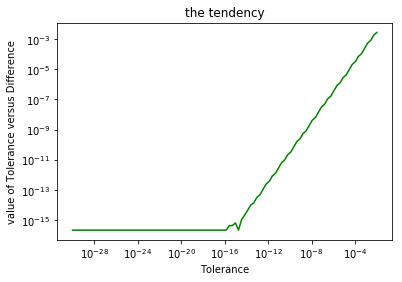

In [6]:
t = numpy.logspace(-30, -2, 100)
y = numpy.logspace(-30, 0, 100)
for i in numpy.linspace(0, 99, 100, dtype = int):
    y[i] = abs(compute_sum(-2.0, 3.0, t[i])-(-1.2))
plt.loglog(t, y, 'g')
plt.title("the tendency")
# print t 
plt.xlabel("Tolerance")
# print y
plt.ylabel("value of Tolerance versus Difference")
plt.show()

Analysis: 
$$
\begin{align}
    &When ~tolerance ~is ~smaller ~than ~10^{-16}, ~the ~value ~is ~almost ~static; \\     
    &When ~tolerance ~starts ~from ~10^{-16}~and ~approaches ~10^{-2}, ~the ~value ~becomes ~larger ~linearly ~as ~tolerance ~becomes ~larger.
\end{align}
$$

## Question 3

**(a)** [7] Compute the first 3 terms of the Taylor series of the function
$$
    f(x) = e^{-x^2} \sin( x - \pi)
$$
centered at $x_0 = \pi$.

Solution: We get derivatives,
$$
\begin{aligned}
    f'(x) &= e^{-x^2} [-2x\cdot sin(x - \pi) + cos(x - \pi)] \\
    f''(x) &= e^{-x^2} [4x^2\cdot sin(x - \pi) - 4x\cdot cos(x - \pi) - 3sin(x - \pi)] \\
    f^{(3)} &= e^{-x^2} [-8x^3\cdot sin(x - \pi) + 12x^2\cdot cos(x - \pi) + 18x\cdot sin(x - \pi) -7cos(x - \pi)]
\end{aligned}
$$
For the first 3 terms at $x_0 = \pi$,
$$
\begin{aligned}
    T_3(x) &= \sum^3_{n=0} \frac{f^{(n)}(x_0)\cdot(x-x_0)^n}{n!} \\
    &= 0 + \frac{e^{-\pi^2}\cdot(x-\pi)}{1!} + \frac{-e^{-\pi^2}\cdot 4\pi\cdot(x-\pi)^2}{2!} + \frac{e^{-\pi^2}\cdot (12\pi^2 -7)\cdot(x-\pi)^3}{3!} \\
    &= e^{-\pi^2}\cdot(x-\pi) - 2\pi \cdot e^{-\pi^2}\cdot (x-\pi)^2 + \frac{e^{-\pi^2}\cdot (12\pi^2 -7)\cdot(x-\pi)^3}{6}
\end{aligned}
$$

**(b)** [8] Solve the ODE
$$
    u'' + u' + \frac{5}{4} u = 0
$$
with initial conditions $u(0) = 5$ and $u'(0) = 1$.  Plot the solution and comment on its behavior as $t \rightarrow \infty$.

Solution: Solve the characteristic equation,
\begin{align}
    \lambda^2 + \lambda + \frac{5}{4} = 0
\end{align}
And get
\begin{align}
    \lambda_1 &= -\frac{1}{2}+ i \\
    \lambda_2 &= -\frac{1}{2}+ i
\end{align}
Therefore 
\begin{align}
    u = e^{-\frac{x}{2}}\cdot (C_1 cosx + C_2 sinx)
\end{align}
Then derive C$_1$ and C$_2$ by initial conditions,
\begin{align}
    u(0) &= C_1 = 5 \\
    u'(0) &= -\frac{5}{2} + C_2 = 1 \\
    \Downarrow \\
    C_1 = 5, ~~~~ C_2 &= \frac{7}{2} \\
    \Downarrow \\
    u &= e^{-\frac{x}{2}}\cdot (5 cosx + \frac{7}{2} sinx)
\end{align}

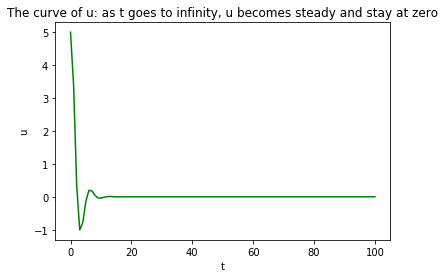

In [8]:
x = numpy.linspace(0, 100, 100)
y = (5*numpy.cos(x)+3.5*numpy.sin(x))*numpy.exp(-x/2)
plt.plot(x, y, 'g')
plt.title("The curve of u: as t goes to infinity, u becomes steady and stay at zero")
plt.xlabel("t")
plt.ylabel("u")
plt.show()
# As t goes to infinity, u becomes steady and approaches zero.

## Question 5 - The Trouble with Tribbles

Plot the following data using the appropriate plot types making sure to adding lables, units, and titles.  Also refer to the [matplotlib gallery](http://matplotlib.org/gallery.html) to figure out how to plot some of what is asked.

**(a)** [5] The number of tribbles (furry animals from Star Trek) is modeled by Spock to be exponential.  Spock predicts that in a 3 day period that the tribbles will go from an initial population number of $N_0 = 1$ to $N(3) = 1,771,561$ tribbles.  The assumptions that Spock made are the following:
 - The tribbles reproduce every 12 hours.
 - Tribbles reproduce asexually so that 1 tribble will produce 10 more tribbles leading to a total of 11 tribbles.
Write a function that confirms Spock's estimate and plot the function.

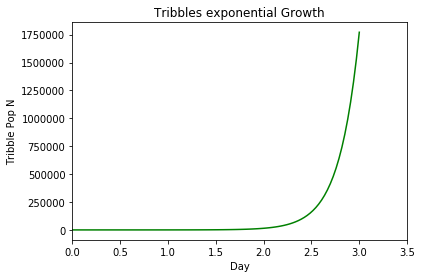

In [10]:
x = numpy.linspace(0, 3, 100)
# based on exponential assumption
y = 11**(2*x)
plt.plot(x, y,'g')
plt.title("Tribbles exponential Growth")
# every 12 hours = 0.5 day
plt.xlabel("Day")
plt.xlim([0,3.5])
plt.ylabel("Tribble Pop N")
plt.show()

**(b)** [5] Assuming that tribbles cannot stack themselves on top of each other perfectly we also would like to model and plot the spread of tribbles throughout our space ship.  Assume our space ship is a square use the following function to plot the population on our space ship of tribbles:
$$
    N(x, y) = N_0 e^{-r^2/\sigma^2}
$$
where $N_0 = 1000$, $\sigma = 0.1$ and $r$ is the distance from the middle of our space ship.

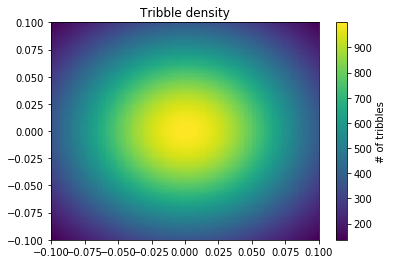

In [25]:
x = numpy.linspace(-0.10, 0.10, 100)
y = numpy.linspace(-0.10, 0.10, 100)
# Orthogonal coordinates a^2+b^2=dist^2=r^2
a, b = numpy.meshgrid(x, y)
F = 1000 * numpy.exp(-(a**2+b**2)/0.01)
plt.title("Tribble density")
plt.pcolor(a, b, F)
plt.colorbar(label = "# of tribbles")
plt.show()